In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

sns.set_style("ticks")
plt.rcParams.update({"figure.dpi": 300})

In [2]:
df = pd.read_csv("./data/data.csv", parse_dates=["date"])
df["mavg"] = df.rolling(7, min_periods=1)["kwh"].mean()
df["is_peak"] = df["kwh"] > df["mavg"]
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: './data/data.csv'

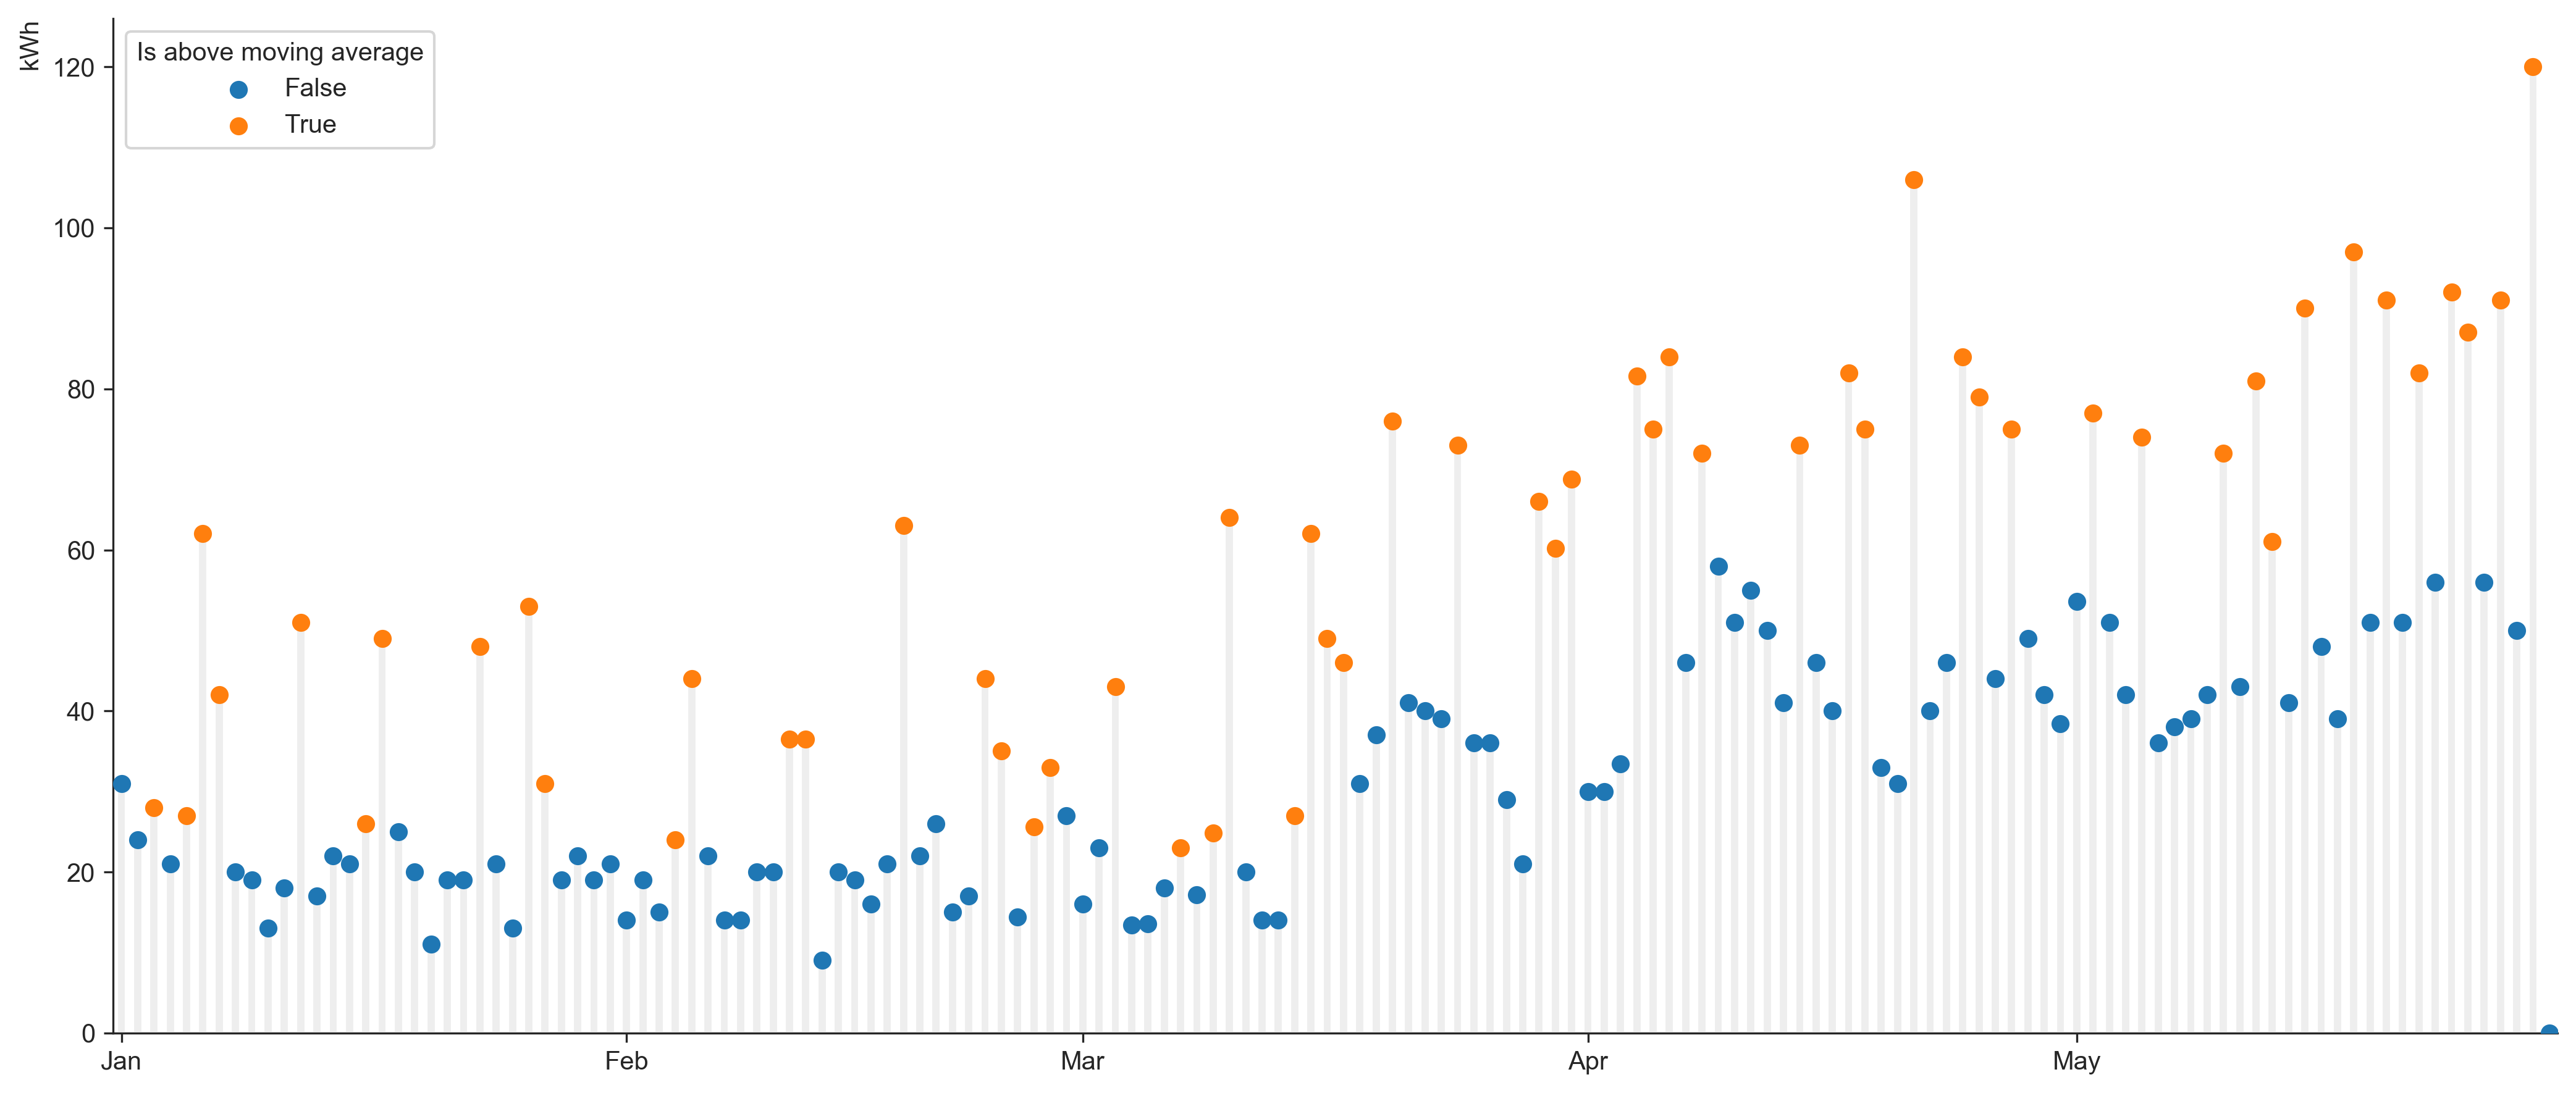

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

g = sns.barplot(data=df, x="date", y="kwh", ax=ax, color="#eeeeee", width=0.6)
_ = sns.stripplot(data=df, x="date", hue="is_peak", y="kwh", ax=ax, size=7)

g.set_xlabel("", loc="right")
g.set_ylabel("kWh", loc="top")

# Define the date format
date_form = DateFormatter("%b")
g.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each month
g.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

sns.despine()
plt.legend(title='Is above moving average')
plt.show()